# Event log analysis 

In [209]:
### IMPORT ###
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


### LOCAL IMPORT ###
from config import config_reader

In [210]:
### GLOBALS ###
yaml_config = config_reader.config_read_yaml("config.yml", "config")
# print(yaml_config) # debug
log_dir = str(yaml_config["LOG_DIR"])
data_dir = str(yaml_config["DATA_DIR"]) # directory with survey and other data

# INPUT
log_file_name = "edu_event_log_PAGE_raw_filtered_terziles-DEF-332-cases.csv" # Set the file name

# FUNCTIONS

# MAIN

In [211]:
print(">> Setings")
print("Input event log file:", log_file_name)
path_log_file = Path(log_dir) /log_file_name 
print("Path file:", path_log_file)

>> Setings
Input event log file: edu_event_log_PAGE_raw_filtered_terziles-DEF-332-cases.csv
Path file: data_log/edu_event_log_PAGE_raw_filtered_terziles-DEF-332-cases.csv


In [212]:
print(">> Reading event log")
dic_t = {'Case ID':object, 'CaseLength':int, 'SUS_Tercile':int, 'Apprendimento percepito_Tercile':int, 'UEQ - Overall_Tercile':int} 
df_log = pd.read_csv(path_log_file, sep=",", dtype=dic_t)

>> Reading event log


In [213]:
print(">> Removing columns from event log")
col_del_list = ['Variant', 'Variant index']
for col_del in col_del_list:
  if col_del in df_log.columns:
    print("Removig column:", col_del)
    df_log.drop(columns=col_del, inplace=True)

>> Removing columns from event log
Removig column: Variant
Removig column: Variant index


In [214]:
df_log.shape

(8091, 55)

In [215]:
print("Distinct cases in event log:", df_log["Case ID"].nunique())

Distinct cases in event log: 332


In [216]:
df_log.head(5)

,Case ID,Activity,Complete Timestamp,menu,pageOrder,pagePara,eventPage,click_num,dbclick_num,QuizSessionCount,...,UEQ - Hedonic,UEQ - Overall,TotalTimeHH,TotalTimeDD,CaseLength,Class,SUS_Tercile,Apprendimento percepito_Tercile,UEQ - Overall_Tercile,QuizAnswerCorrectRatioOverAll_Tercile
0,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,INTRO,2024-04-18 13:58:12.000,menu_1,1,0,PageIN,0,0,10,...,1.25,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0
1,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,INTRO-Q,2024-04-18 13:58:26.000,menu_1,1,0,PageIN,0,0,10,...,1.25,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0
2,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,PROG,2024-04-18 13:58:29.000,menu_1,2,0,PageIN,0,0,10,...,1.25,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0
3,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,PROG-Q,2024-04-18 13:58:31.000,menu_1,2,0,PageIN,0,0,10,...,1.25,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0
4,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,VARS,2024-04-18 13:58:34.000,menu_1,3,0,PageIN,0,0,10,...,1.25,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0


In [217]:
df_log.columns

Index(['Case ID', 'Activity', 'Complete Timestamp', 'menu', 'pageOrder',
       'pagePara', 'eventPage', 'click_num', 'dbclick_num', 'QuizSessionCount',
       'QuizAnswerCorrectTotal', 'QuizAnswerWrongTotal',
       'QuizAnswerCorrectRatioOverCount', 'QuizAnswerCorrectRatioOverAll',
       'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7', 'Q_8', 'Q_9', 'Q_10',
       'Q_11', 'Q_12', 'Q_13', 'Q_14', 'Q_15', 'Q_16', 'Q_17', 'Q_18', 'Q_19',
       'Q_20', 'Q_21', 'Q_22', 'Q_23', 'Q_24', 'Q_25', 'Q_26', 'Q_27', 'Q_28',
       'SUS', 'Apprendimento percepito', 'UEQ - Pragmatic', 'UEQ - Hedonic',
       'UEQ - Overall', 'TotalTimeHH', 'TotalTimeDD', 'CaseLength', 'Class',
       'SUS_Tercile', 'Apprendimento percepito_Tercile',
       'UEQ - Overall_Tercile', 'QuizAnswerCorrectRatioOverAll_Tercile'],
      dtype='object')

In [218]:
null_counts = df_log.isnull().sum()
null_counts

Case ID                                   0
Activity                                  0
Complete Timestamp                        0
menu                                      0
pageOrder                                 0
pagePara                                  0
eventPage                                 0
click_num                                 0
dbclick_num                               0
QuizSessionCount                          0
QuizAnswerCorrectTotal                    0
QuizAnswerWrongTotal                      0
QuizAnswerCorrectRatioOverCount          11
QuizAnswerCorrectRatioOverAll            11
Q_1                                       0
Q_2                                       0
Q_3                                       0
Q_4                                       0
Q_5                                       0
Q_6                                       0
Q_7                                       0
Q_8                                       0
Q_9                             

## Merging event log with new features

In [219]:
print(">> Adding class cardinality")
df_log["Class"].unique()

>> Adding class cardinality


array(['SMTO2', 'SMTO1', 'SMCN1', 'SMCN2', 'SMTO3', 'ECO', 'SAA'],
      dtype=object)

In [220]:
# Calculate the count (numerosity) of each unique value in the "Class" column
distinct_class_counts = df_log[['Class', 'Case ID']].drop_duplicates().groupby('Class').size().to_dict()
distinct_class_counts

{'ECO': 125,
 'SAA': 97,
 'SMCN1': 17,
 'SMCN2': 26,
 'SMTO1': 27,
 'SMTO2': 22,
 'SMTO3': 18}

In [221]:
total_distinct_class_counts = sum(distinct_class_counts.values())
print("Total:", total_distinct_class_counts)

Total: 332


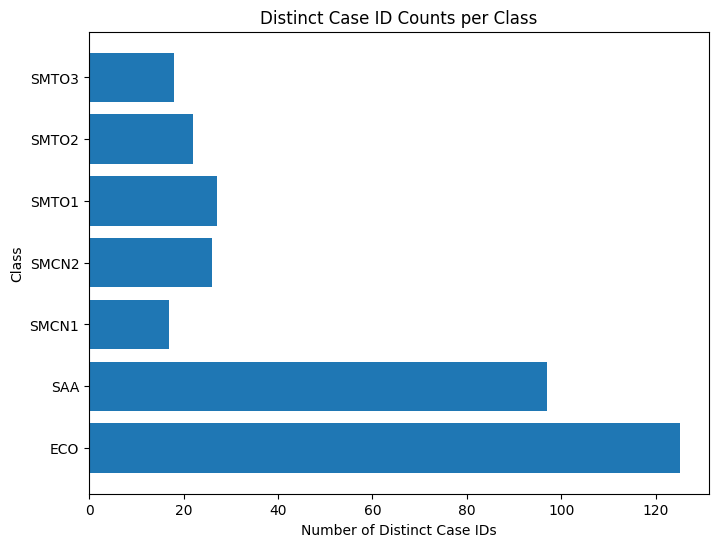

In [222]:
# Plotting a horizontal bar chart for the distinct class counts
plt.figure(figsize=(8, 6))
plt.barh(list(distinct_class_counts.keys()), list(distinct_class_counts.values()))
plt.xlabel("Number of Distinct Case IDs")
plt.ylabel("Class")
plt.title("Distinct Case ID Counts per Class")
plt.show()

In [223]:
# Step 2: Map the calculated counts back to the df_log based on the "Class" values
df_log['Class_Count'] = df_log['Class'].map(distinct_class_counts)

In [224]:
df_log.head(5)

,Case ID,Activity,Complete Timestamp,menu,pageOrder,pagePara,eventPage,click_num,dbclick_num,QuizSessionCount,...,UEQ - Overall,TotalTimeHH,TotalTimeDD,CaseLength,Class,SUS_Tercile,Apprendimento percepito_Tercile,UEQ - Overall_Tercile,QuizAnswerCorrectRatioOverAll_Tercile,Class_Count
0,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,INTRO,2024-04-18 13:58:12.000,menu_1,1,0,PageIN,0,0,10,...,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0,22
1,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,INTRO-Q,2024-04-18 13:58:26.000,menu_1,1,0,PageIN,0,0,10,...,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0,22
2,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,PROG,2024-04-18 13:58:29.000,menu_1,2,0,PageIN,0,0,10,...,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0,22
3,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,PROG-Q,2024-04-18 13:58:31.000,menu_1,2,0,PageIN,0,0,10,...,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0,22
4,GVWlrRcW8aRsQs8SMs7siZUm0UYaRZTABK8BDfLhtcgmcT...,VARS,2024-04-18 13:58:34.000,menu_1,3,0,PageIN,0,0,10,...,0.375,0.04,0.0,22,SMTO2,1,1,2,1.0,22


## Saving event log enriched

In [225]:
print(">> Saving enriched event log")
log_file_name_enr = f"{Path(log_file_name).stem}_enr.csv"
path_log_file = Path(log_dir) / log_file_name_enr 
print("Path:", path_log_file)
df_log.to_csv(path_log_file, sep = ",", index=False)

>> Saving enriched event log
Path: data_log/edu_event_log_PAGE_raw_filtered_terziles-DEF-332-cases_enr.csv
